# Plots y visualización de los datos

In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data = pd.read_csv("../data/datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
%matplotlib inline

In [5]:
#savefig("path_donde_guardar_img.jpeg")

### Scatter Plot

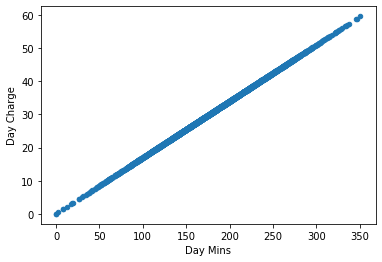

In [6]:
#Relación entre la cantidad de carga de día y los minutos de llamada
data.plot(kind="scatter", x="Day Mins", y="Day Charge")

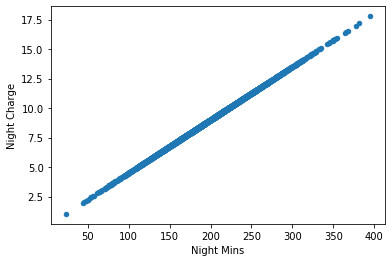

In [7]:
#Relación entre la cantidad de carga de noche y los minutos de llamada
data.plot(kind="scatter", x="Night Mins", y="Night Charge")

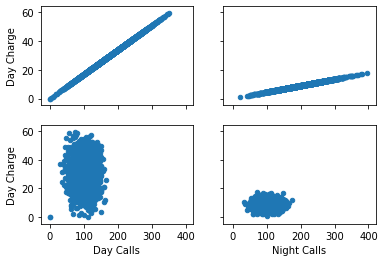

In [12]:
figure,axs = plt.pyplot.subplots(2,2, sharex=True,sharey=True)
data.plot(kind="scatter", x="Day Mins", y="Day Charge", ax=axs[0][0])
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

### Histogramas de frecuencias

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

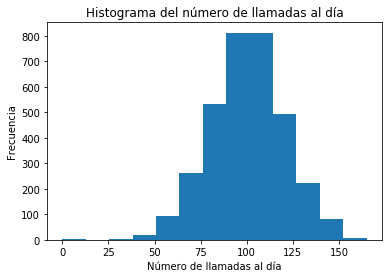

In [28]:
#Regla de Sturges para saber cómo implementar mejor el histograma
k = int(np.ceil(1+np.log2(3333)))
plt.pyplot.hist(data["Day Calls"], bins= k) #bins=[0,30,60,...200] sin Sturges
plt.pyplot.xlabel("Número de llamadas al día")
plt.pyplot.ylabel("Frecuencia")
plt.pyplot.title("Histograma del número de llamadas al día")

### Boxplot, diagrama de caja y bigotes
* Valor del quantil 25 es el borde inferior de la caja
* Valor del quantil 75 es el borde superior de la caja
* Línea adentro de la caja es la mediana
* Tamaño de la caja = rango intercuantilico (q75-q25)

Text(0.5, 1.0, 'Boxplot de lamadas diarias')

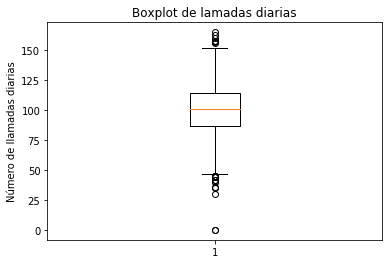

In [34]:
plt.pyplot.boxplot(data["Day Calls"])
plt.pyplot.ylabel("Número de llamadas diarias")
plt.pyplot.title("Boxplot de lamadas diarias")

In [35]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [36]:
IQR=data["Day Calls"].quantile(.75)-data["Day Calls"].quantile(.25)
IQR

27.0

In [37]:
#Dónde comienza y termina el bigote inferior
data["Day Calls"].quantile(.25)-1.5*IQR

46.5

In [39]:
#Dónde comienza y termina el bigote superior
data["Day Calls"].quantile(.75)+1.5*IQR

154.5